In [3]:
# Importing all the required Classes
from Simulation import *
from Particle import *
from Forces import *

# Create a simulation
sim = Simulation()

# Load test particles
# LoadTestParticles(sim)

# Creates the particles
np.random.seed(0)
ParticleCreation(1000000,sim)

# Add gravity force to the simulation
sim.Forces.append(Gravity())
sim.Forces.append(Lorenz(np.array([4.0,1.0,0.0])))

# Runns the simulation 
sim.Run(20, 0.01)


Generating particles:


100%|████████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:14<00:00, 67517.68 Particle(s)/s]



Initialising Particle Simulations.
Setting up enviroment

Pre-calculating Forces per particles:


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:24<00:00, 12.38s/Force ]



Simulating particles:


 53%|█████████████████████████████████████████▋                                     | 1055/2000 [7:32:13<6:45:04, 25.72s/ Time Step]


KeyboardInterrupt: 

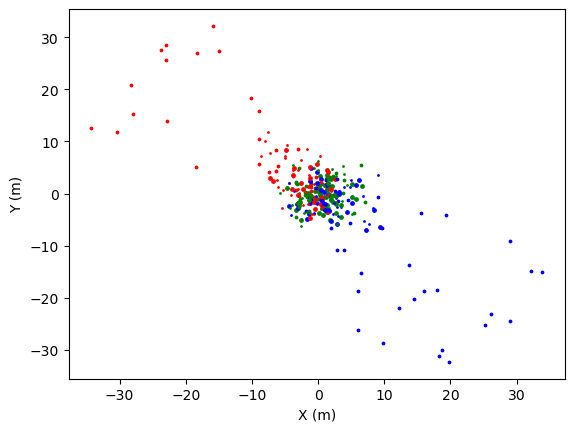

In [10]:
sim.Plot()


Generating particles:


100%|████████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:10<00:00, 92781.78 Particle(s)/s]


obj to np array


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:19<00:00, 25.71it/s]


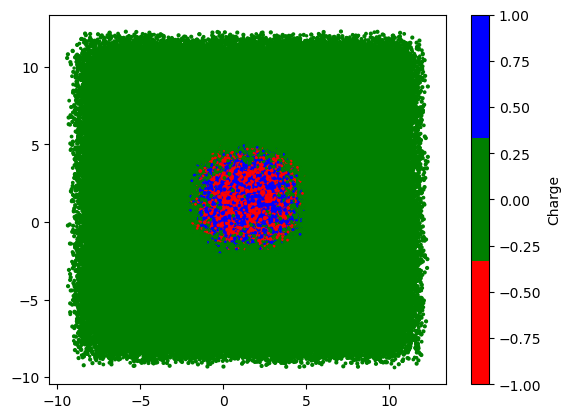

In [73]:
# Importing all the required Classes
from Simulation import *
from Particle import *
from Forces import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def calNumPyArray(Particles):
    position = np.zeros([len(Particles), 3])
    velocity = np.zeros([len(Particles), 3])
    force = np.zeros([len(Particles), 3])
    mass = np.zeros([len(Particles), 1])
    charge = np.zeros([len(Particles), 1])

    print("obj to np array")
    for x in tqdm(range(len(Particles))):
        position[x] = Particles[x].Position
        velocity[x] = Particles[x].Velocity
        force[x] = Particles[x].SumForce
        mass[x] = Particles[x].Mass
        charge[x] = Particles[x].Charge

    return [position, velocity, force, mass, charge]

# use this method if paths are not need to be tracked
def update(dt, position, velocity, force, mass, charge):
    
    # Cal forces
    force *= 0 # zero out forces, allows for re-calcuations each loop
    force += np.array([0,0,-9.8]) #gravity
    force += (charge * np.cross(velocity, np.array([0, 0, 10]))) #magnetic force
    
    # update position and velocitioes
    acceleration = force / mass
    velocity += acceleration * dt
    position += velocity*dt - 0.5*acceleration*dt*dt
    
    negative_z = position[:, 2] < 0 # find when particle below xy plane (-z values)
    
    velocity[negative_z] *= np.array([0.9,0.9,-1]) # bounce logic (flip z and reduce x,y Velcoties)
    
    position[:,2] = abs(position[:,2]) # the ground plane
    

            

# Create a simulation
sim = Simulation()

# Load test particles
# LoadTestParticles(sim)
# p1 = Particle([0, 0, 0], [0, 1, 3], 1, -1)
# p2 = Particle([0, 0, 0], [0, 1, 3], 1, 1)
# p3 = Particle([0, 0, 0], [0, 1, 3], 1, 0)
# sim.Particles.append(p1)
# sim.Particles.append(p2)
# sim.Particles.append(p3)

# Creates the particles
np.random.seed(0)
ParticleCreation(1000000,sim)


[position, velocity, force, mass, charge] = calNumPyArray(sim.Particles)

for x in tqdm(range(int(5/0.01))):
    update(0.01, position, velocity, force, mass, charge)
    
cmap = ListedColormap(['red', 'green', 'blue'])  # Define your custom colormap here

# Normalize the charge values to match the colormap indices
normalize = plt.Normalize(charge.min(), charge.max())

# Create a scatter plot with the custom colormap
plt.scatter(
    position[:, 0],
    position[:, 1],
    s=mass,
    c=charge,  # Use the charge values for color mapping
    cmap=cmap,
    norm=normalize,
)

# Add a colorbar to the plot
plt.colorbar(label='Charge')

In [54]:
print(position)
position[:,2] = abs(position[:,2])
print(position)

[[ 0.42321595 -0.18484385  0.55358   ]
 [-0.42321595 -0.18484385  0.55358   ]
 [ 0.          3.62388517  0.55358   ]]
[[ 0.42321595 -0.18484385  0.55358   ]
 [-0.42321595 -0.18484385  0.55358   ]
 [ 0.          3.62388517  0.55358   ]]



Generating particles:


100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [00:01<00:00, 77045.11 Particle(s)/s]


Unloading particles -> obj to array


100%|████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 208.31it/s]


Re-loading Particles -> array to obj


100%|███████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 757398.09it/s]


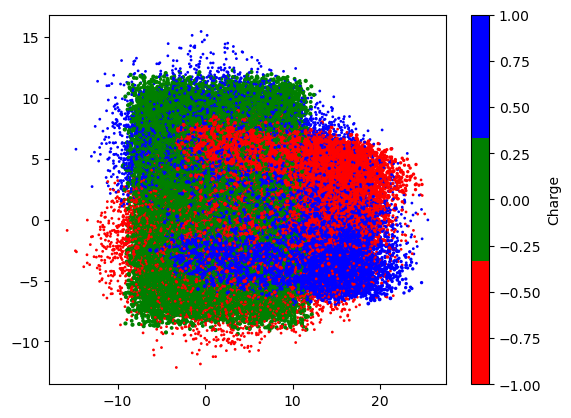

In [86]:
# Importing all the required Classes
from Simulation import *
from Particle import *
from Forces import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def calNumPyArray(Particles):
    position = np.zeros([len(Particles), 3])
    velocity = np.zeros([len(Particles), 3])
    force = np.zeros([len(Particles), 3])
    mass = np.zeros([len(Particles), 1])
    charge = np.zeros([len(Particles), 1])

    print("Unloading particles -> obj to array")
    for x in tqdm(range(len(Particles))):
        position[x] = Particles[x].Position
        velocity[x] = Particles[x].Velocity
        force[x] = Particles[x].SumForce
        mass[x] = Particles[x].Mass
        charge[x] = Particles[x].Charge

    return [position, velocity, force, mass, charge]

# use this method if paths are not need to be tracked
def updateOptmise(dt, position, velocity, force, mass, charge):
    
    # Cal forces
    force *= 0 # zero out forces, allows for re-calcuations each loop
    force += np.array([0,0,-9.8]) #gravity
    force += (charge * np.cross(velocity, np.array([10, -1, -2]))) #magnetic force
    
    # update position and velocitioes
    acceleration = force / mass
    velocity += acceleration * dt
    position += velocity*dt - 0.5*acceleration*dt*dt
    
    negative_z = position[:, 2] < 0 # find when particle below xy plane (-z values)
    
    velocity[negative_z] *= np.array([0.9,0.9,-1]) # bounce logic (flip z and reduce x,y Velcoties)
    
    position[:,2] = abs(position[:,2]) # the ground plane
    
def reloadParticels(Particles, position, velocity, force, mass, charge):
    print("Re-loading Particles -> array to obj")
    for x in tqdm(range(len(Particles))):
        Particles[x].Position = position[x]
        Particles[x].Velocity = velocity[x]
        Particles[x].SumForce = force[x]
        Particles[x].Mass = mass[x]
        Particles[x].Charge = charge[x]
        
    

            

# Create a simulation
sim = Simulation()

# Load test particles
# LoadTestParticles(sim)
# p1 = Particle([0, 0, 0], [0, 1, 3], 1, -1)
# p2 = Particle([0, 0, 0], [0, 1, 3], 1, 1)
# p3 = Particle([0, 0, 0], [0, 1, 3], 1, 0)
# sim.Particles.append(p1)
# sim.Particles.append(p2)
# sim.Particles.append(p3)

# Creates the particles
np.random.seed(0)
ParticleCreation(100000,sim)


[position, velocity, force, mass, charge] = calNumPyArray(sim.Particles)

for x in tqdm(range(int(5/0.01))):
    update(0.01, position, velocity, force, mass, charge)

reloadParticels(sim.Particles, position, velocity, force, mass, charge)
    
cmap = ListedColormap(['red', 'green', 'blue'])  # Define your custom colormap here

# Normalize the charge values to match the colormap indices
normalize = plt.Normalize(charge.min(), charge.max())

# Create a scatter plot with the custom colormap
plt.scatter(
    position[:, 0],
    position[:, 1],
    s=mass,
    c=charge,  # Use the charge values for color mapping
    cmap=cmap,
    norm=normalize,
)

# Add a colorbar to the plot
plt.colorbar(label='Charge')